In [1]:
from kan import *
import torch as torch
seed = 1
torch.manual_seed(seed)

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3, seed=1)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

In [2]:
model.fit(dataset, opt="LBFGS", steps=20);

train loss: 1.50e-02 | test loss: 1.58e-02 | reg: 5.07e+00 : 100%|██| 20/20 [00:04<00:00,  4.28it/s]


In [3]:
# initialize a more fine-grained KAN with G=10
model = model.refine(10)

In [4]:
model.fit(dataset, opt="LBFGS", steps=20)

train loss: 3.53e-04 | test loss: 3.80e-04 | reg: 5.08e+00 : 100%|██| 20/20 [00:06<00:00,  3.22it/s]


{'train_loss': [array(0.00619122, dtype=float32),
  array(0.00500667, dtype=float32),
  array(0.00448667, dtype=float32),
  array(0.00384288, dtype=float32),
  array(0.00299656, dtype=float32),
  array(0.00233759, dtype=float32),
  array(0.00167069, dtype=float32),
  array(0.00134439, dtype=float32),
  array(0.00126156, dtype=float32),
  array(0.00122807, dtype=float32),
  array(0.00118081, dtype=float32),
  array(0.00110659, dtype=float32),
  array(0.000977, dtype=float32),
  array(0.0008231, dtype=float32),
  array(0.00057427, dtype=float32),
  array(0.00045478, dtype=float32),
  array(0.00042252, dtype=float32),
  array(0.00040409, dtype=float32),
  array(0.00038171, dtype=float32),
  array(0.00035331, dtype=float32)],
 'test_loss': [array(0.00601042, dtype=float32),
  array(0.00481997, dtype=float32),
  array(0.00400774, dtype=float32),
  array(0.00367009, dtype=float32),
  array(0.00299806, dtype=float32),
  array(0.00244861, dtype=float32),
  array(0.0017747, dtype=float32),
  ar

In [5]:
grids = np.array([3,10,20,50])

seed = 2
torch.manual_seed(seed)

train_losses = []
test_losses = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=seed)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

train loss: 1.44e-02 | test loss: 1.51e-02 | reg: 6.57e+00 : 100%|██| 50/50 [00:13<00:00,  3.71it/s]
train loss: 2.72e-04 | test loss: 3.09e-04 | reg: 6.60e+00 : 100%|██| 50/50 [00:10<00:00,  4.97it/s]
train loss: 1.67e-05 | test loss: 2.07e-05 | reg: 6.60e+00 : 100%|██| 50/50 [00:07<00:00,  7.00it/s]
train loss: 1.63e-06 | test loss: 3.70e-06 | reg: 6.60e+00 : 100%|██| 50/50 [00:06<00:00,  8.05it/s]


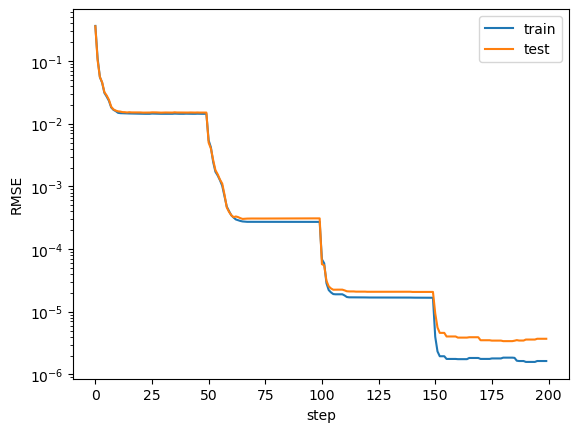

In [6]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

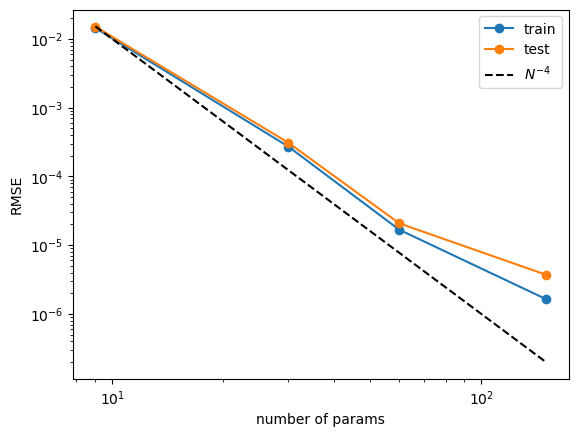

In [7]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Domin\\anaconda3\\envs\\KANProject\\lib\\site-packages\\kan/assets/img/sum_symbol.png'

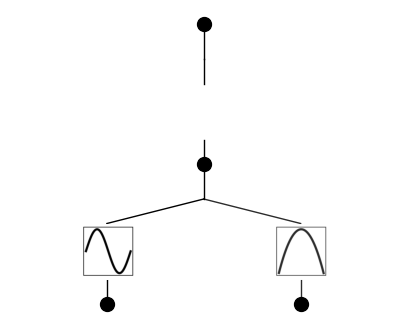

In [8]:
model.plot()